<center>
    <img src='pic/logo.jpg' width='400px'>
    <h1>ĐỒ ÁN KHOA HỌC MÁY TÍNH</h1>
</center>
 
---

**<h2>Đề Tài:Dự đoán bệnh nhân bị ung thư</h2>**
<img src='pic/ungthu.jpg' width='300px'>

**<h4>Giảng viên hướng dẫn : Nguyễn Thị Phương Bắc</h4>**
**<h4>Sinh viên thực hiện:Hà Văn Đạt</h4>**
**<h4>Mã sinh viên:2021050169</h4>**
**<h4>Lớp:DCCTKH65B</h4>**

---

**Mô tả bài toán:**
- Xây dựng mô hình học máy dự đoán khả năng bị ung thư phổi với các thông số liên quan.
<img src='pic/viemphoi.jpg' width='300px'>

# <b>1 <span style='color:#6497b1'>|</span> Thu thập dữ liệu:</b>


**Mô tả tập dữ liệu thu thập được phục vụ bài toán:**
- Tên Dataset: **LUNG_CANCER.csv**
- File dữ liệu chứa thông tin của **309 bệnh nhân có dấu hiệu liên quan đến ung thư Phổi**
- Mỗi dòng ứng với thông tin của một bệnh nhân, bao gồm 15 thuộc tính:
     - *GENDER: Giới tính bệnh nhân (chuỗi: M– F)*
     - *AGE: Tuổi của bệnh nhân (số)*
     - *SMOKING: Bệnh nhân có hút thuốc không (số)*
     - *YELLOW_FINGERS : Cho biết loại triệu chứng tay bị vàng (số)*
     - *ANXIETY: bệnh nhân có lo lắng hay không (số)*
     - *PEER_PRESSURE: áp lực từ bạn bè của bệnh nhân (số)*
     - *CHRONIC DISEASE: có bệnh nền không (số)*
     - *FATIGUE: bệnh nhân có bị mệt mỏi không*
     - * ALLERGY: Cho biết bệnh nhân có bị dị ứng không? *
    - * WHEEZING: Cho biết bệnh nhân có bị khó thở không?*
     - *ALCOHOL CONSUMING:bệnh nhân có uống rượu không?*
      - *COUGHING: bệnh nhân bị ho khan không?*
       -*SHORTNESS OF BREATH:hụt hơi*
     - *SWALLOWING DIFFICULTY: khó nuốt*
         


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [2]:
#Gọi các thư viện sử dụng cho Project:
# Data analysis and wrangling:
import pandas as pd
import numpy as np

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#---------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [3]:
#đọc dữ liệu
import pandas as pd
df = pd.read_csv('Data/lung_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  LUNG_CANCER            2700 non-null   object
dtypes: int64(10), object(

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,LUNG_CANCER
0,M,76,1,2,2,No,2,Yes,1,1,No,2,2,1,No
1,F,73,1,2,2,Yes,2,Yes,1,1,Yes,2,2,1,No
2,M,74,1,1,2,Yes,1,Yes,2,2,Yes,1,2,1,No
3,F,70,1,2,2,No,2,Yes,1,2,No,2,2,1,Yes
4,F,27,1,1,2,No,1,No,2,2,Yes,1,1,2,No


In [5]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,LUNG_CANCER
2995,M,40,2,2,1,No,2,Yes,2,2,Yes,1,2,2,Yes
2996,F,30,2,1,1,Yes,1,No,2,1,No,1,2,2,No
2997,M,37,2,2,2,No,2,Yes,2,1,No,1,1,2,No
2998,M,64,2,2,2,Yes,2,No,1,2,Yes,1,2,1,No
2999,F,57,2,2,2,No,2,Yes,2,2,Yes,2,1,1,Yes


In [6]:
df.sample()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,LUNG_CANCER
2580,F,79,2,2,1,Yes,1,No,1,1,Yes,2,2,1,NaN


In [7]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC_DISEASE,ALLERGY,WHEEZING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,49.375000,1.494000,1.497333,1.498000,1.512667,1.481000,1.503333,1.496000,1.505000,1.493333
std,17.549388,0.500047,0.500076,0.500079,0.499923,0.499722,0.500072,0.500067,0.500058,0.500039
min,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,50.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000
75%,65.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,79.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# <b>2 <span style='color:#6497b1'>|</span> Tiền xử lý dữ liệu</b>

In [16]:
#1. Quan sát Các thuộc tính object
df.describe(include='O')

,GENDER,PEER_PRESSURE,FATIGUE,ALCOHOL_CONSUMING,LUNG_CANCER
count,3000,3000,3000,3000,2700
unique,2,2,2,2,2
top,F,Yes,No,No,No
freq,1526,1525,1546,1524,1381


GENDER
F    1526
M    1474
Name: count, dtype: int64


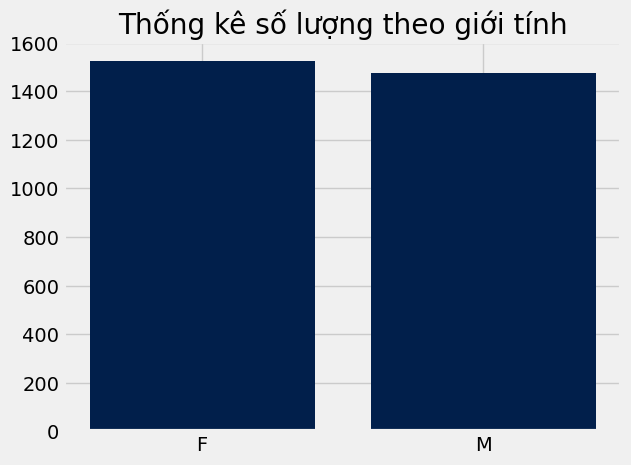

In [18]:
#Thống kê dữ liệu theo giới tính
kq_gender = df['GENDER'].value_counts()
print(kq_gender)
#----------------------------------------------
#trực quan hóa kết quả
import matplotlib.pyplot as plt
plt.bar(kq_gender.index,kq_gender.values)
plt.title('Thống kê số lượng theo giới tính')
plt.show()

SMOKING
1    1518
2    1482
Name: count, dtype: int64


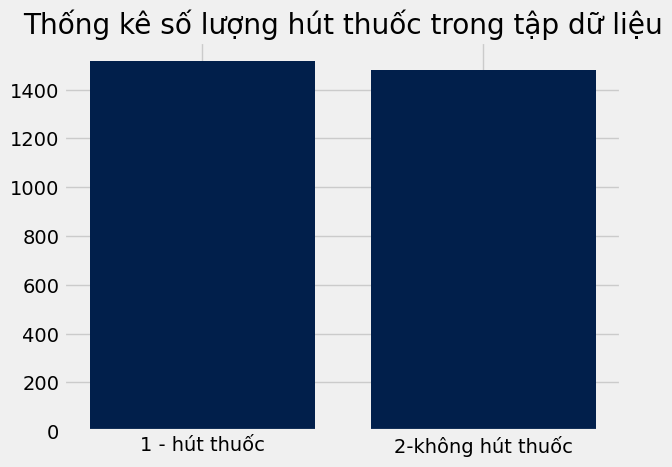

In [19]:
#Thống kê số lượng bệnh nhân hút thuốc và không hút thuốc (Đánh giá mức độ cân bằng dữ liệu)
kq = df['SMOKING'].value_counts()
print(kq)
#----------------------------------------------
#trực quan hóa kết quả
import matplotlib.pyplot as plt
plt.bar(['1 - hút thuốc','2-không hút thuốc'],kq.values)
plt.title('Thống kê số lượng hút thuốc trong tập dữ liệu')
plt.show()

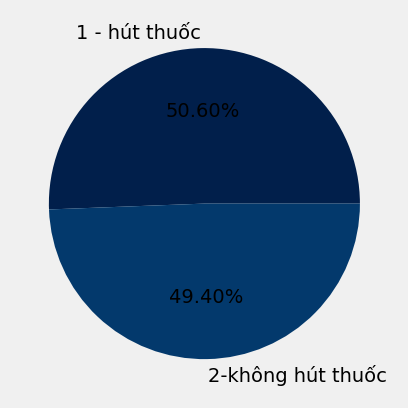

In [20]:
# vẽ biểu đồ tròn

plt.pie(kq.values , labels=['1 - hút thuốc','2-không hút thuốc'], autopct= '%.2f%%')
plt.show()
#tập dữ liệu tương đối cân bằng giữa 2 lớp 0-1

## Kiểm tra dữ liệu missing

In [25]:
#Kiểm tra dữ liệu thiếu trong Dataset
df.isnull().sum()

GENDER                     0
AGE                        0
SMOKING                    0
YELLOW_FINGERS             0
ANXIETY                    0
PEER_PRESSURE              0
CHRONIC_DISEASE            0
FATIGUE                    0
ALLERGY                    0
WHEEZING                   0
ALCOHOL_CONSUMING          0
COUGHING                   0
SHORTNESS_OF_BREATH        0
SWALLOWING_DIFFICULTY      0
LUNG_CANCER              300
dtype: int64

In [27]:
#Các dòng dữ liệu chứa missing của thuộc tính Type
df.loc[df[['YELLOW_FINGERS']].isnull().any(axis=1)]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,LUNG_CANCER


In [29]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,LUNG_CANCER
0,M,76,1,2,2,No,2,Yes,1,1,No,2,2,1,No
1,F,73,1,2,2,Yes,2,Yes,1,1,Yes,2,2,1,No
2,M,74,1,1,2,Yes,1,Yes,2,2,Yes,1,2,1,No
3,F,70,1,2,2,No,2,Yes,1,2,No,2,2,1,Yes
4,F,27,1,1,2,No,1,No,2,2,Yes,1,1,2,No


In [31]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,LUNG_CANCER
2995,M,40,2,2,1,No,2,Yes,2,2,Yes,1,2,2,Yes
2996,F,30,2,1,1,Yes,1,No,2,1,No,1,2,2,No
2997,M,37,2,2,2,No,2,Yes,2,1,No,1,1,2,No
2998,M,64,2,2,2,Yes,2,No,1,2,Yes,1,2,1,No
2999,F,57,2,2,2,No,2,Yes,2,2,Yes,2,1,1,Yes


In [33]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

In [35]:
print('Số lượng missing data trong tập Train: \n')
missing_values(df)

Số lượng missing data trong tập Train: 

File dữ liệu bao gồm có: 15 cột.
Có 1 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
LUNG_CANCER,300,10.0


In [37]:
#Dánh sách bệnh nhân missing thuộc tính LUNG_CANCER trong tập dữ liệu
df[df['LUNG_CANCER'].isnull()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,LUNG_CANCER
5,F,61,2,2,1,Yes,2,Yes,2,2,Yes,2,2,1,NaN
46,F,78,2,2,1,No,1,No,2,2,No,1,1,1,NaN
47,F,43,1,2,1,No,1,No,2,2,Yes,2,2,1,NaN
49,F,41,1,1,2,Yes,2,Yes,1,2,Yes,2,2,1,NaN
92,F,22,2,1,2,No,2,Yes,1,1,Yes,1,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,M,69,2,2,2,Yes,2,No,2,2,No,1,1,2,NaN
2960,M,29,2,2,1,Yes,2,No,2,1,No,1,1,2,NaN
2962,F,62,1,2,1,Yes,1,No,1,1,No,2,1,1,NaN
2970,M,73,2,2,1,Yes,2,No,1,2,No,1,1,1,NaN


In [39]:
# Xác định số lượng giá trị thiếu trong cột 'LUNG_CANCER'
missing_count = df['LUNG_CANCER'].isnull().sum()

# Xác định phân phối của các giá trị hiện có trong cột 'LUNG_CANCER'
value_counts = df['LUNG_CANCER'].value_counts()

# Nếu số lượng giá trị 'yes' lớn hơn hoặc bằng số lượng giá trị 'no', điền giá trị thiếu bằng 'yes'
if value_counts['Yes'] >= value_counts['No']:
    df['LUNG_CANCER'].fillna('Nes', inplace=True)
else:
    df['LUNG_CANCER'].fillna('No', inplace=True)

## Chuyển dữ liệu về dạng số

In [42]:
#Liệt kê các giá trị của thuộc tính Gender |Type
print('1. Thuộc tính Gender:', df['GENDER'].unique())
print('2. Thuộc tính PEER_PRESSURE:', df['PEER_PRESSURE'].unique())
print('3. Thuộc tính FATIGUE:', df['FATIGUE'].unique())
print('4. Thuộc tính ALCOHOL_CONSUMING:', df['ALCOHOL_CONSUMING'].unique())



1. Thuộc tính Gender: ['M' 'F']
2. Thuộc tính PEER_PRESSURE: ['No' 'Yes']
3. Thuộc tính FATIGUE: ['Yes' 'No']
4. Thuộc tính ALCOHOL_CONSUMING: ['No' 'Yes']


In [44]:
convert_cancer= {'Yes':1,'No':2}
df['LUNG_CANCER']=df['LUNG_CANCER'].map(convert_cancer).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  LUNG_CANCER            3000 non-null   int32 
dtypes: int32(1), int64(10

In [46]:
#Trong tập dữ liệu có 1 thuộc tính: Gender 
#Thực hiện chuyển đổi cho 1 thuộc tính này
convert_gender = {'M':1,'F':2}
convert_PEER= {'Yes':1,'No':2}
convert_FATIGUE= {'Yes':1,'No':2}
convert_ALCOHOL= {'Yes':1,'No':2}
df['GENDER']=df['GENDER'].map(convert_gender).astype(int)
df['PEER_PRESSURE']=df['PEER_PRESSURE'].map(convert_PEER).astype(int)
df['FATIGUE']=df['FATIGUE'].map(convert_FATIGUE).astype(int)
df['ALCOHOL_CONSUMING']=df['ALCOHOL_CONSUMING'].map(convert_ALCOHOL).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int32
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int32
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int32
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int32
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  LUNG_CANCER            3000 non-null   int32
dtypes: int32(5), int64(10)
memory usage: 2

### Phân tách Đầu vào X - Nhãn y---

* Biến độc lập X: 
* Biến phụ thuộc (nhãn) y:


In [49]:
#liệt kê danh sánh tên các cột
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'LUNG_CANCER'],
      dtype='object')

In [51]:
X = df.iloc[:,0:14].values

#cách 3
X

array([[ 1, 76,  1, ...,  2,  2,  1],
       [ 2, 73,  1, ...,  2,  2,  1],
       [ 1, 74,  1, ...,  1,  2,  1],
       ...,
       [ 1, 37,  2, ...,  1,  1,  2],
       [ 1, 64,  2, ...,  1,  2,  1],
       [ 2, 57,  2, ...,  2,  1,  1]], dtype=int64)

In [53]:
X.shape

(3000, 14)

In [55]:
#Tách dữ liệu biến phụ thuộc:
y = df.iloc[:,14].values

y

array([2, 2, 2, ..., 2, 2, 1])

In [57]:
y.shape

(3000,)

# <b>3 <span style='color:#6497b1'>|</span>Khám phá Dữ liệu</b>

In [60]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

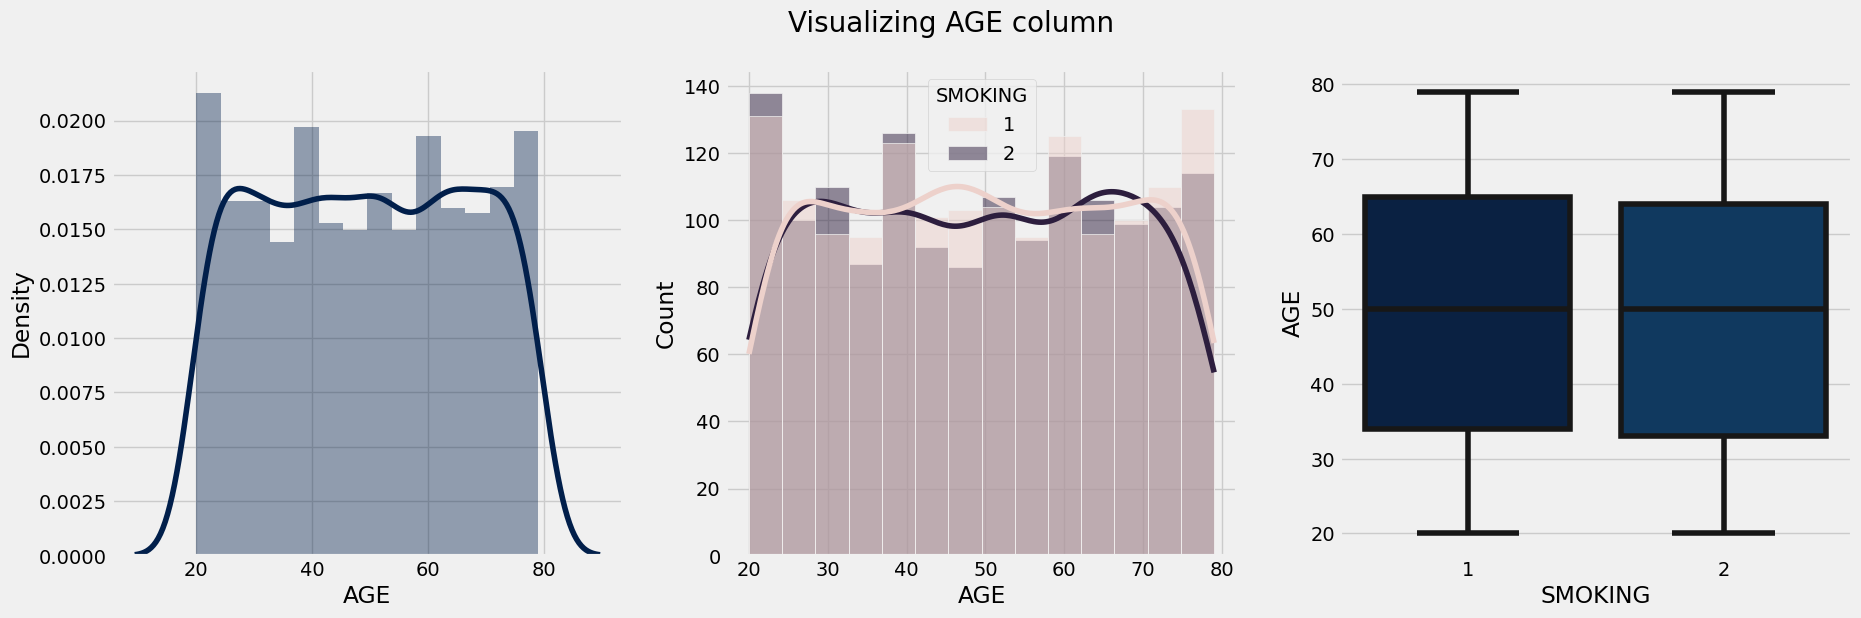

In [62]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='SMOKING',kde=True)
sns.boxplot(x=df['SMOKING'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Text(0.5, 0.98, 'Trực quan hóa cột AGE và cột phân loại')

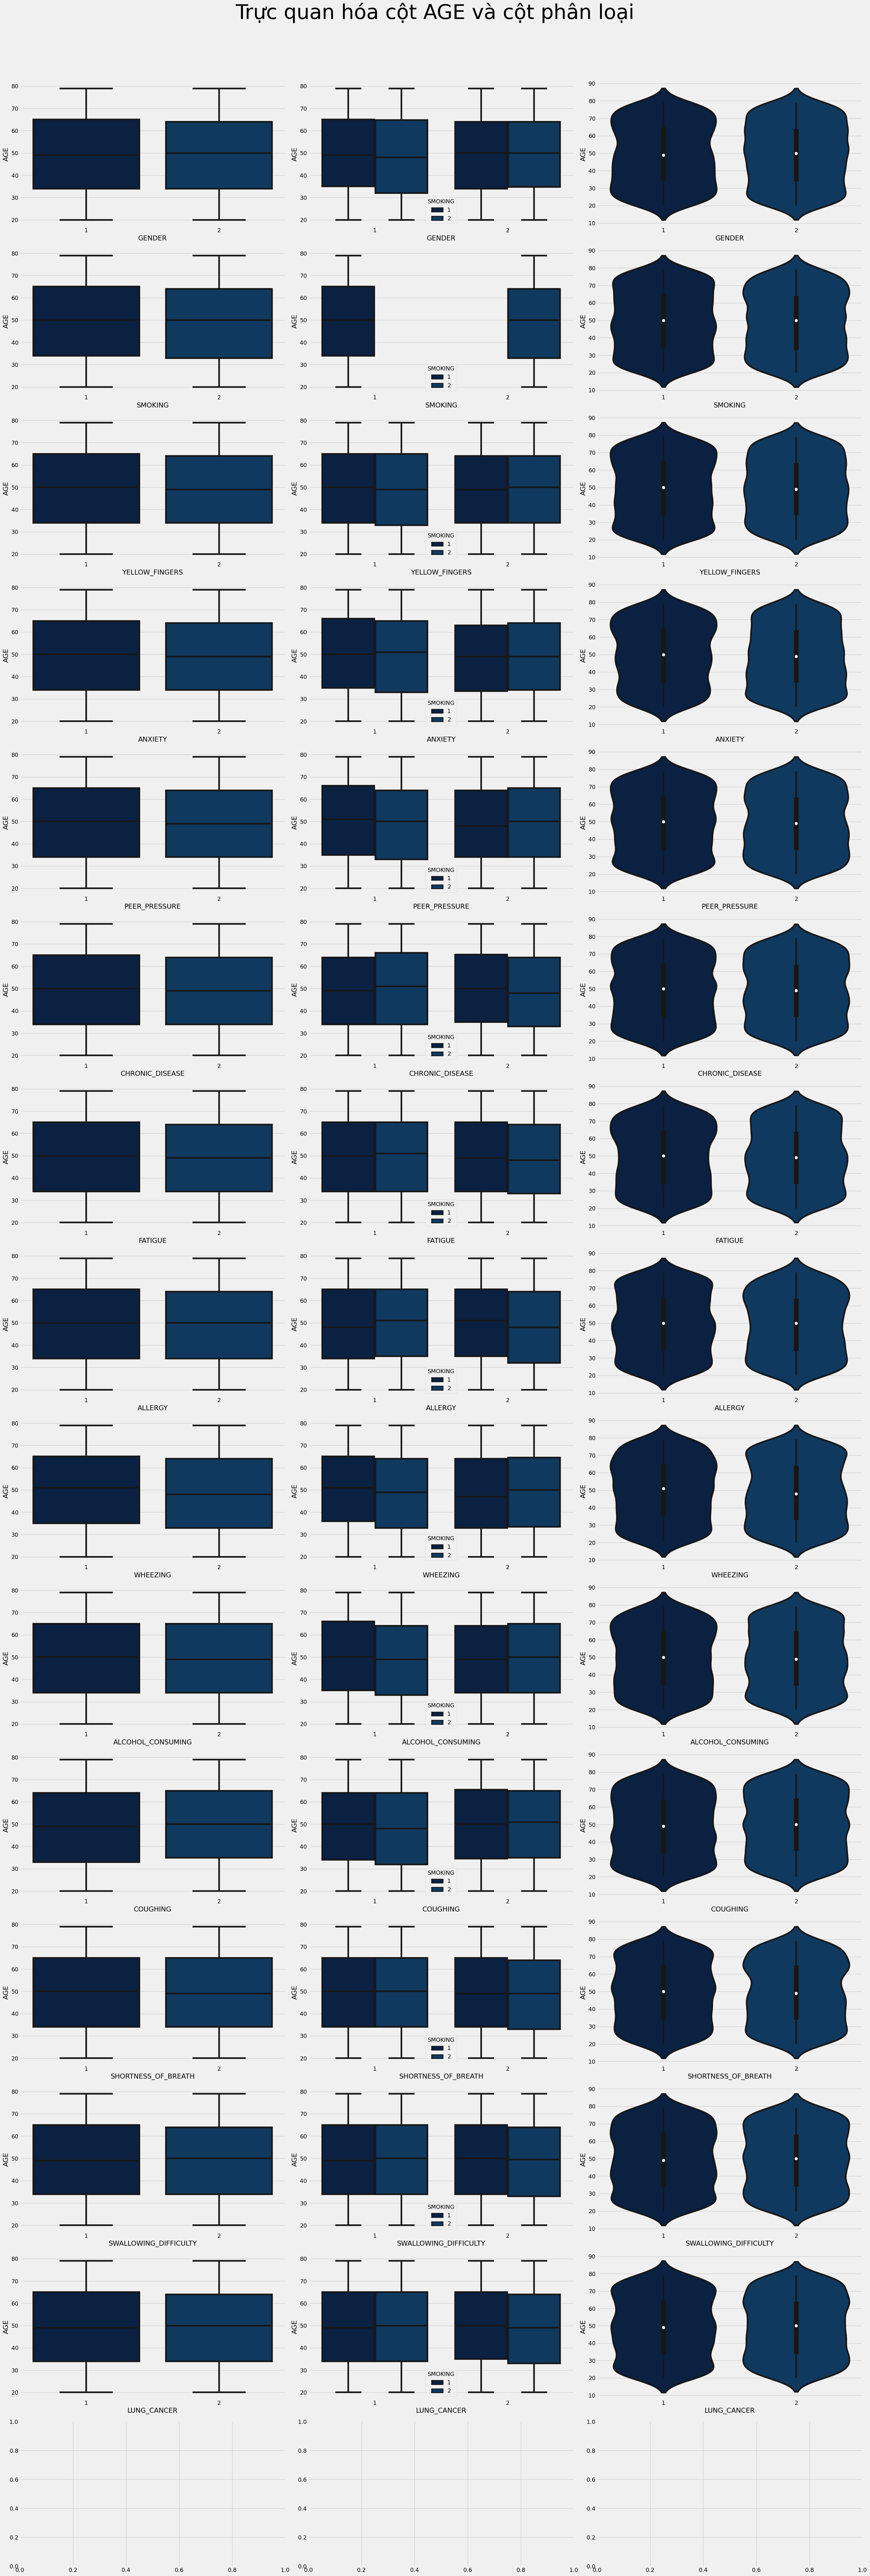

In [63]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['SMOKING'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Trực quan hóa cột AGE và cột phân loại",fontsize=50)

<Axes: >

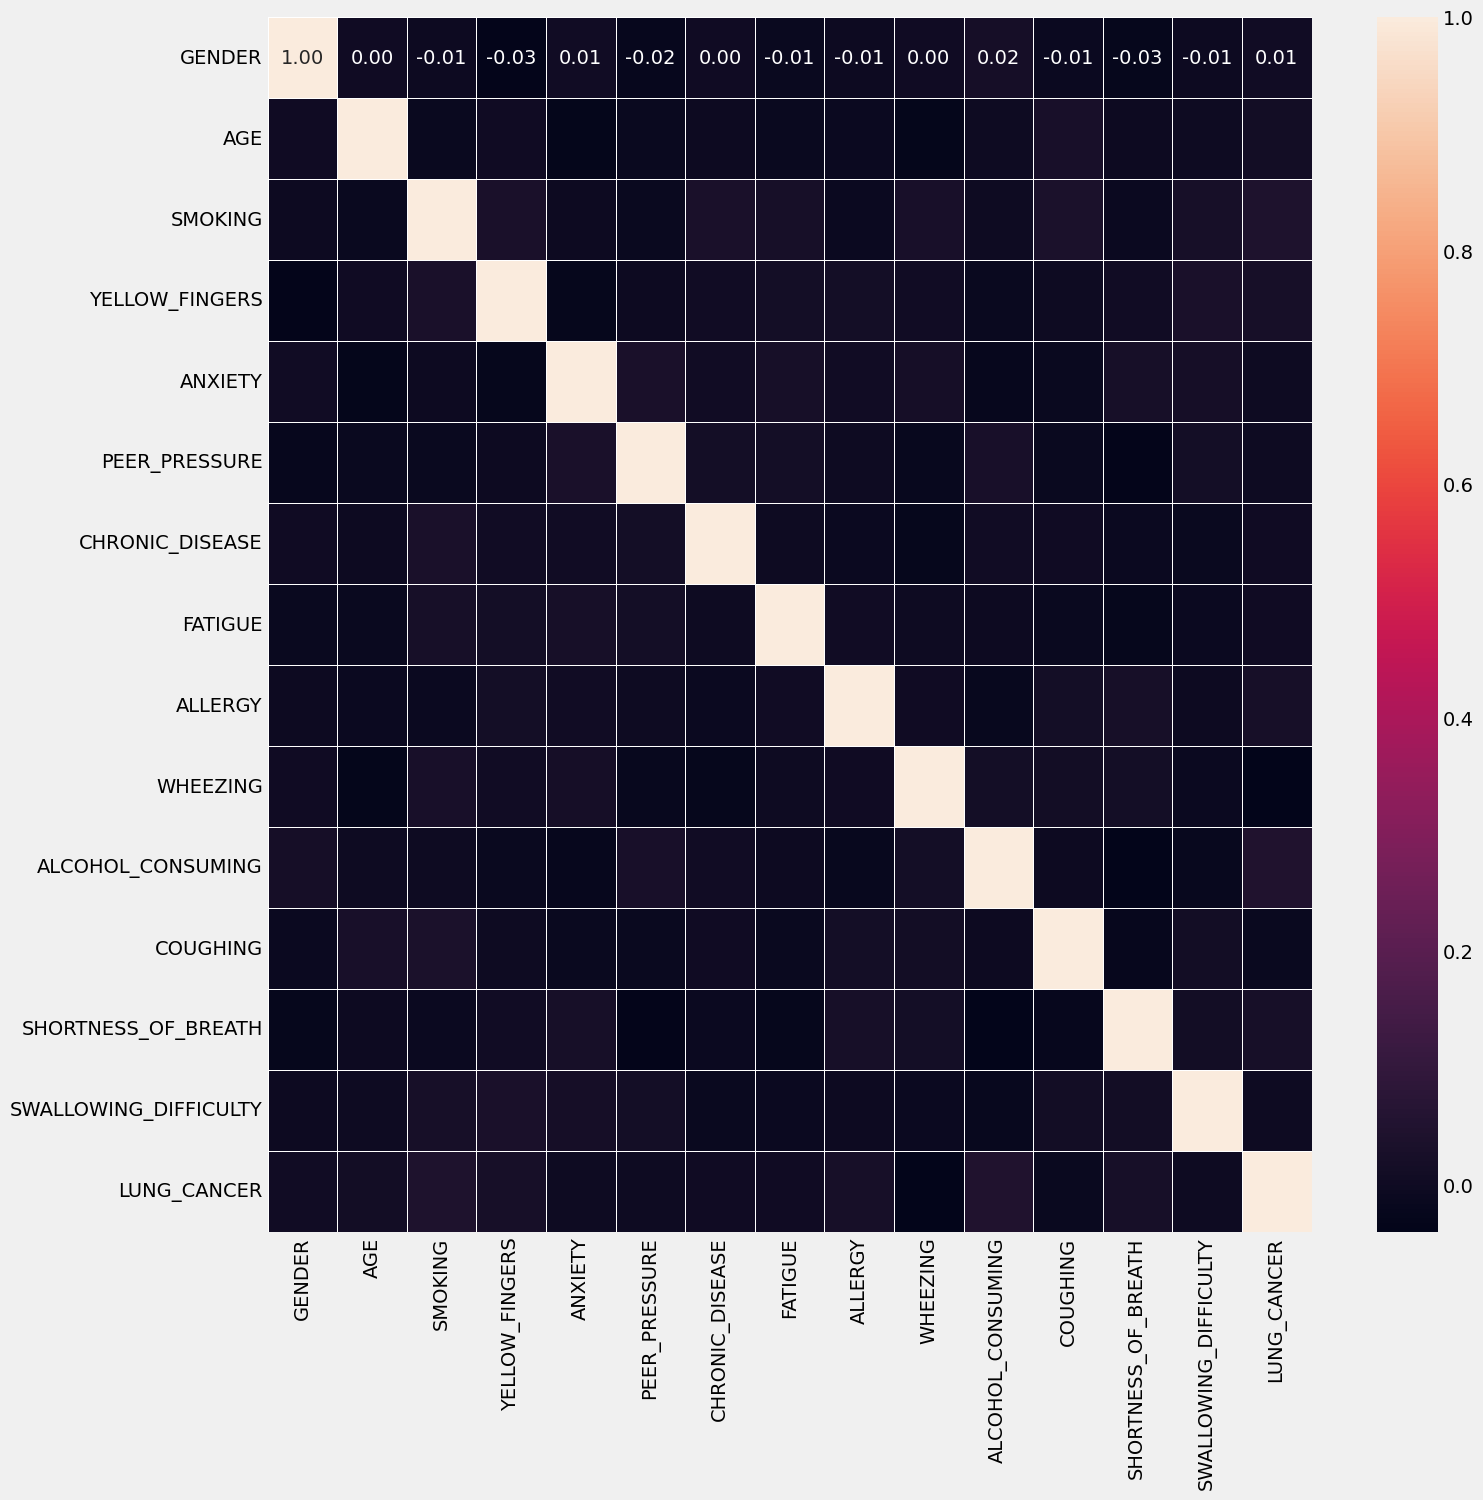

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

# <b>4 <span style='color:#6497b1'>|</span> Xây dựng mô hình học máy:</b>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Tách tập dữ liệu Train - Test</b></p>
</div> 


### Tách tập dữ liệu ra tập Training - Test: 

In [69]:
#Gọi hàm tách dữ liệu trong thư viện sklearn:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,#train_size=0.8
                                                    test_size=0.2,shuffle=True,random_state=42)


print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 2400
2. Kích thước tập Test    : 600


In [70]:
#hiển thị tập X_test : 262 mẫu
print(X_test)
print(X_test.shape)

[[ 1 27  2 ...  1  1  2]
 [ 2 64  2 ...  1  2  1]
 [ 2 34  1 ...  1  1  2]
 ...
 [ 2 34  1 ...  2  2  2]
 [ 1 35  2 ...  2  2  2]
 [ 2 23  2 ...  1  1  2]]
(600, 14)


In [71]:
X_train

array([[ 2, 62,  1, ...,  2,  1,  1],
       [ 1, 38,  1, ...,  1,  2,  2],
       [ 2, 55,  1, ...,  1,  1,  1],
       ...,
       [ 2, 77,  1, ...,  1,  2,  1],
       [ 1, 29,  2, ...,  2,  2,  2],
       [ 2, 77,  2, ...,  1,  2,  2]], dtype=int64)

In [72]:
y_train


array([2, 1, 2, ..., 2, 2, 1])

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Xây dựng thuật toán KNN(K-Nearest Neighbors)</b></p>
</div> 

In [74]:
#Khai báo sử dụng thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN, với các tham số mặc định
KNN = KNeighborsClassifier(n_neighbors=5)

In [82]:
#Danh sách tham số của mô hình:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Huấn luyện mô hình (Training)

In [85]:
# Trong bước 3: chúng đã chuẩn bị được dữ liệu cho tập Train + Test
#Sử dụng tập Train cho huấn luyện: Feature = X_train | Outcome = y_train
#Phương thức fit() sử dụng để huấn luyện model
KNN.fit(X_train,y_train)
print(KNN)

KNeighborsClassifier()


In [87]:
#Sử dụng tập dữ liệu test để chạy model dự đoán 
y_pred = KNN.predict(X_test)
print('Kết quả dự đoán trên 60 hồ sơ tập Test:', y_pred)

Kết quả dự đoán trên 60 hồ sơ tập Test: [1 2 1 1 1 2 2 2 1 1 2 2 1 2 1 1 2 1 2 1 1 2 2 1 2 2 1 1 2 2 1 1 2 1 2 1 2
 1 1 2 2 2 2 1 2 2 1 2 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2
 2 2 1 1 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1
 1 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 1 1 1 2 2 2 1 1 2 1
 2 1 2 1 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 1 1 2 2 1
 1 2 2 2 2 2 1 1 1 2 1 1 2 1 1 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1 1 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 1 2 1 2 2 1 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 2 1 2 1
 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 1 2 2
 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 2 1 2 2 2
 2 2 2 2 2 1 2 2 2 2 1 1 2 2 1 1 2 2 1 2 2 2 1 2 2 2 1 2 2 1 1 1 2 2 1 1 2
 1 2 1 2 2 2 2 1 1 1 1 2 1 2 1 2 1 2 2 1 2 1 1 2 2 2 1 1 2 2 2 2 1 2 2 2 1
 1 1 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1

In [89]:
#Check thử độ chính xác cho 20 hồ sơ đầu tiên:
print('y_test:',y_test[:20])
print('---------------------------------------')
print('y_pred:',y_pred[:20])

y_test: [2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
---------------------------------------
y_pred: [1 2 1 1 1 2 2 2 1 1 2 2 1 2 1 1 2 1 2 1]


# <b>5 <span style='color:#6497b1'>|</span> Đánh mô hình học máy:</b>

In [92]:
#Thay đổi các tham số của mô hình và đánh giá lại:
KNN1 = KNeighborsClassifier(n_neighbors=4,
                          weights = 'distance',
                          algorithm='ball_tree',
                          p=1)
KNN1.fit(X_train,y_train)
print(KNN1)

#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN1.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4, p=1,
                     weights='distance')
Độ chính xác trên tập huấn luyện: 99.92


In [94]:
#Lưu model đã xây dựng thành công để thực hiện dự đoán
import pickle
filename = 'ML_heartattack.sav'
pickle.dump(KNN1, open(filename, 'wb'))
print('Đã lưu thành công!')

Đã lưu thành công!


In [96]:
#load model đã lưu
import pickle
filemodel = 'ML_heartattack.sav'
KNN = pickle.load(open(filemodel, 'rb'))

# <b>4 <span style='color:#6497b1'>|</span> Dự đoán với mô hình xây dựng được (Prediction)</b>

In [ ]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np
model = joblib.load('ML_heartattack.sav')

def predict():
    # Thu thập dữ liệu từ các entry và radio button
    try:
        input_data = [
            int(entry_age.get()),
            int(var_gender.get()),
            int(var_smoking.get()),
            int(var_yellow_fingers.get()),
            int(var_anxiety.get()),
            int(var_peer_pressure.get()),
            int(var_chronic_disease.get()),
            int(var_fatigue.get()),
            int(var_allergy.get()),
            int(var_wheezing.get()),
            int(var_alcohol_consuming.get()),
            int(var_coughing.get()),
            int(var_shortness_of_breath.get()),
            int(var_swallowing_difficulty.get())
        ]
    except ValueError:
        messagebox.showerror("Lỗi", "Vui lòng nhập đầy đủ và đúng thông tin.")
        return
    
    # Đảm bảo đầu vào có đúng 14 đặc trưng
    if len(input_data) == 14:
        input_data = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_data)[0]
        if prediction == 1:
            result = "Bệnh nhân bị ung thư"
        else :
            result = "Bệnh nhân không bị ung thư"
        messagebox.showinfo("Kết quả dự đoán bệnh nhân " + entry_age.get() + "tuổi là", f"Kết quả dự đoán: {result}")
    else:
        messagebox.showerror("Lỗi", "Vui lòng nhập đầy đủ thông tin.")

# Tạo cửa sổ chính
root = tk.Tk()
root.title("Dự đoán bệnh nhân bị bệnh")

# Tạo các biến lưu trữ giá trị từ các radio button và entry
entry_age = tk.Entry(root)
var_gender = tk.StringVar(value="1")
var_smoking = tk.StringVar(value="1")
var_yellow_fingers = tk.StringVar(value="1")
var_anxiety = tk.StringVar(value="1")
var_peer_pressure = tk.StringVar(value="1")
var_chronic_disease = tk.StringVar(value="1")
var_fatigue = tk.StringVar(value="1")
var_allergy = tk.StringVar(value="1")
var_wheezing = tk.StringVar(value="1")
var_alcohol_consuming = tk.StringVar(value="1")
var_coughing = tk.StringVar(value="1")
var_shortness_of_breath = tk.StringVar(value="1")
var_swallowing_difficulty = tk.StringVar(value="1")

# Tạo các nhãn và entry/radio button
attributes = [
    ("Tuổi", entry_age),
    ("Giới tính (1 for Nam, 2 for Nữ)", var_gender),
    ("Hút thuốc", var_smoking),
    ("Vàng da", var_yellow_fingers),
    ("Lo lắng", var_anxiety),
    ("Áp lực ", var_peer_pressure),
    ("Bệnh mãn tính", var_chronic_disease),
    ("Mệt mỏi", var_fatigue),
    ("Dị ứng", var_allergy),
    ("Khó thở", var_wheezing),
    ("uống rượu ", var_alcohol_consuming),
    ("Ho", var_coughing),
    ("Hụt hơi", var_shortness_of_breath),
    ("Khó nuốt", var_swallowing_difficulty)
]

for text, var in attributes:
    frame = tk.Frame(root)
    frame.pack(anchor="w")
    label = tk.Label(frame, text=text)
    label.pack(side="left")
    
    if isinstance(var, tk.Entry):
        entry = var
        entry.pack(side="left")
    else:
        rb1 = tk.Radiobutton(frame, text="Có", variable=var, value="1")
        rb1.pack(side="left")
        rb2 = tk.Radiobutton(frame, text="Không", variable=var, value="2")
        rb2.pack(side="left")

# Nút dự đoán
button = tk.Button(root, text="Predict", command=predict)
button.pack()

# Chạy giao diện
root.mainloop()


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>Thuật toán Decision Tree</b></p>
</div> 

In [157]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Khai báo model Decision Tree sử dụng các tham số mặc định
Tree = DecisionTreeClassifier()

#Các tham số của model DecisionTree
print('DANH SÁC CÁC THAM SỐ CỦA MODEL:')
Tree.get_params()

DANH SÁC CÁC THAM SỐ CỦA MODEL:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [159]:
# Huấn luyện mô hình với dữ liệu huấn luyện
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [161]:
#Đánh giá độ chính xác trên tập Huấn luyện:
acc_train = Tree.score(X_train, y_train)
print("Độ chính xác của tập huấn luyện:",round(acc_train*100,2))

Độ chính xác của tập huấn luyện: 99.92


In [163]:
#Đặt tên cho các thuộc tính và các lớp hoa iris:
feature_names = ["GENDER",
                 "AGE",	
                "SMOKING",	
                "YELLOW_FINGERS",
                "ANXIETY",	
                "PEER_PRESSURE",
                "CHRONIC_DISEASE",	
                "FATIGUE",	
                "ALLERGY",
                "WHEEZING",	
                "ALCOHOL_CONSUMING",	
                "COUGHING",	
                "SHORTNESS_OF_BREAT",	
                "SWALLOWING_DIFFICULTY"	]

target_names = ['0: ung thư', '1: không ung thư']

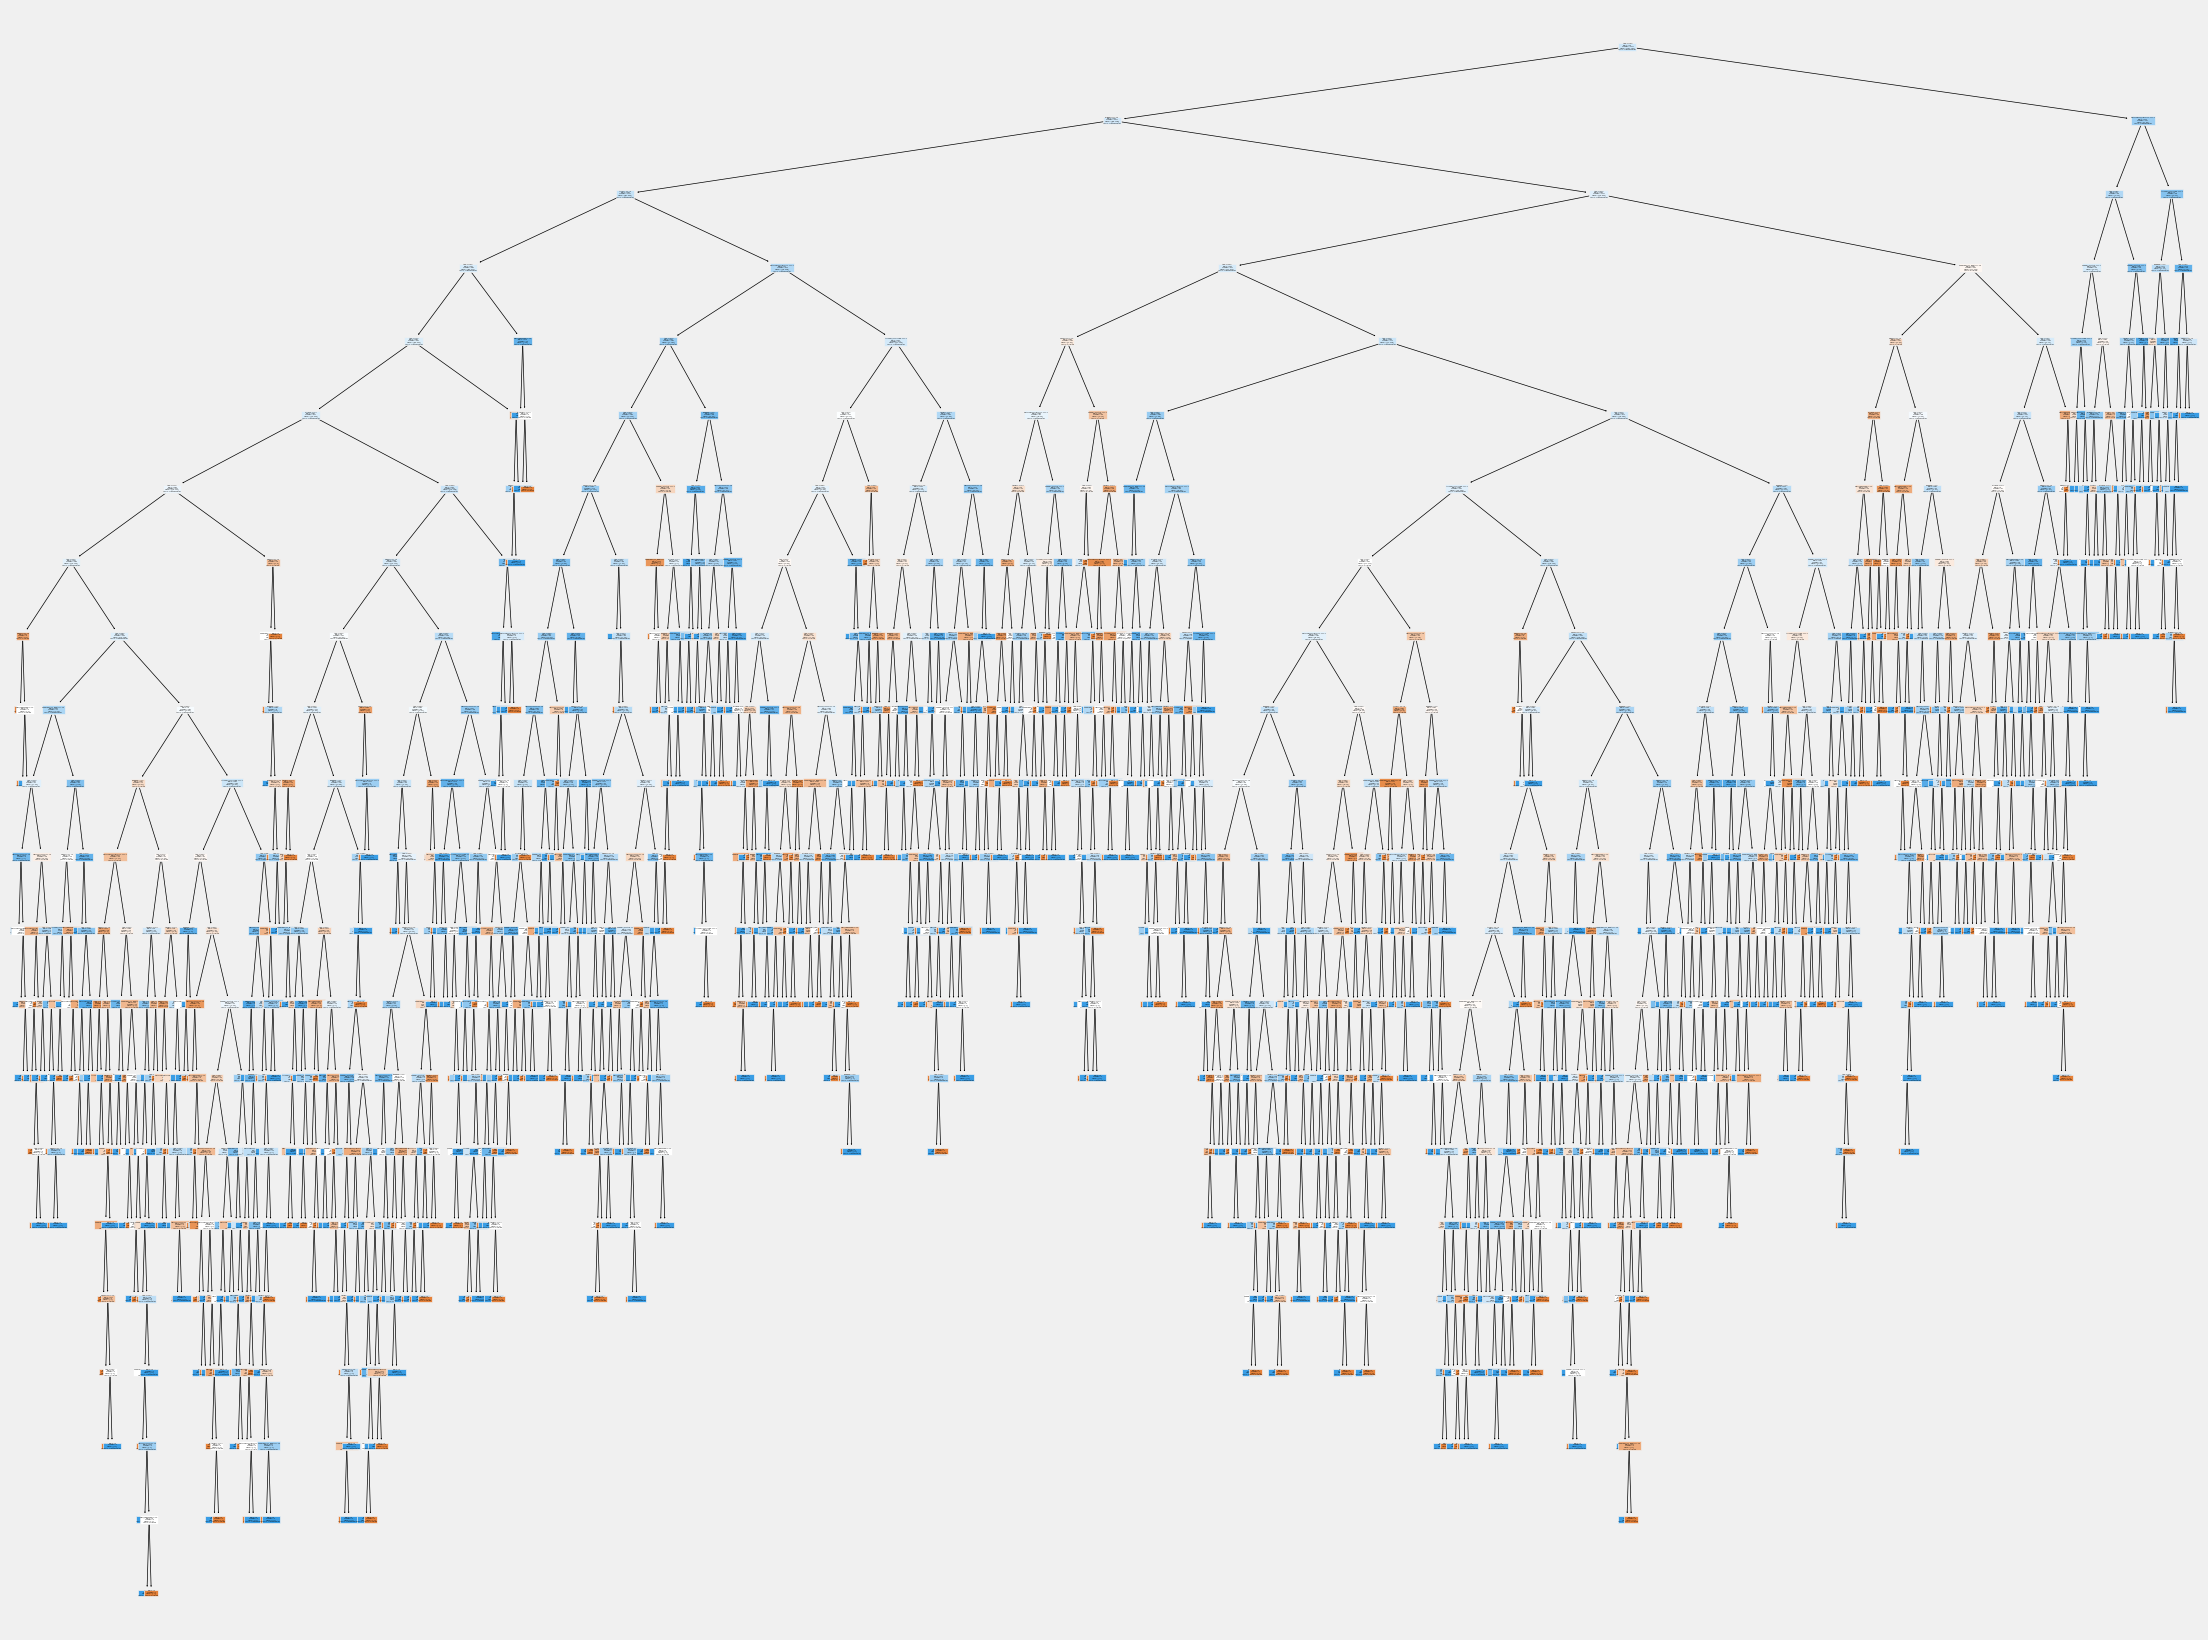

In [165]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

#Hiển thị cây quyết định
tree.plot_tree(Tree, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREAT', 'SWALLOWING_DIFFICULTY']
[0.04907377 0.32299936 0.06314095 0.07318257 0.06683022 0.066561
 0.06037308 0.05281054 0.04544244 0.00831445 0.03255631 0.03938558
 0.06795082 0.05137891]


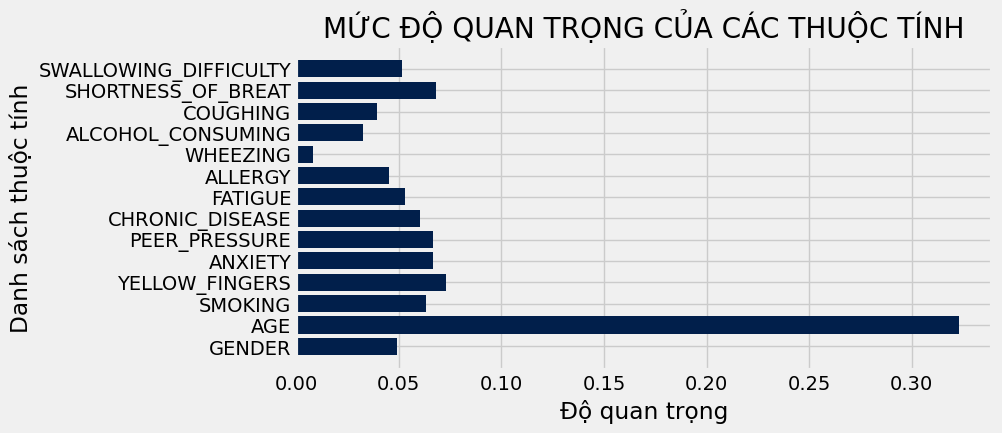

In [173]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(Tree.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,Tree.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THUỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [167]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      Tree.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      Tree.get_n_leaves())

Độ sâu của cây quyết định: 21
Số nút lá của cây quyết định: 966


In [181]:
print(feature_names)
print(X_test[0])

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREAT', 'SWALLOWING_DIFFICULTY']
[ 1 27  2  1  2  1  2  2  2  1  2  1  1  2]


In [185]:
#Phân loại bệnh nhân ung thư trên tập kiểm thử
y_pred = Tree.predict(X_test)

print("Kết quả bệnh nhân ung thư trên tập dữ liệu TEST:")
print("bệnh nhân ung thư: ", y_pred)
print("bệnh nhân không ung thư   : ", y_test)

Kết quả bệnh nhân ung thư trên tập dữ liệu TEST:
bệnh nhân ung thư:  [2 2 1 1 2 1 1 1 2 2 1 2 2 2 1 2 2 1 2 1 2 2 2 1 2 2 1 2 2 2 1 1 2 2 2 1 2
 1 2 2 2 2 1 1 2 2 2 1 2 1 2 1 2 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 2
 1 1 2 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1 2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2
 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 2 2 2 1
 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1 1 2 2 2 2 2 2 1
 1 2 2 2 1 2 2 2 2 2 2 1 2 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 2 2 1 1 2 1 2 2
 2 2 2 2 1 1 2 2 2 1 2 1 2 1 1 2 1 2 2 1 1 2 1 1 1 1 2 2 1 2 1 2 1 1 2 2 1
 1 2 2 1 2 2 1 1 1 2 2 1 2 1 2 1 2 2 2 1 2 1 2 2 2 1 1 2 2 1 1 1 2 1 1 2 1
 2 2 2 2 2 2 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 2 2 1 2 2 2 2 1 2 1 1 2 1 2 1 1
 1 1 2 2 1 1 2 2 2 1 2 1 1 2 1 1 1 2 2 2 2 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2
 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 1 1 2 1 2 2 1 1
 1 2 2 1 1 2 1 1 1 2 2 1 1 1 1 1 2 2 2 1 2 2 1 2 1 2 2 1 1 1 2 1 1 2 1 2 1
 2 2 1 2 2 1 2 2 2 2 1 1 2 2 2 

In [187]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred, normalize=True)
acc_num = accuracy_score(y_test, y_pred, normalize=False)

print("Độ chính xác đạt của model trên tập Test:", round(acc*100,2))
print("Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y_test))

Độ chính xác đạt của model trên tập Test: 46.0
Tổng số mẫu dự đoán đúng: 276 / 600


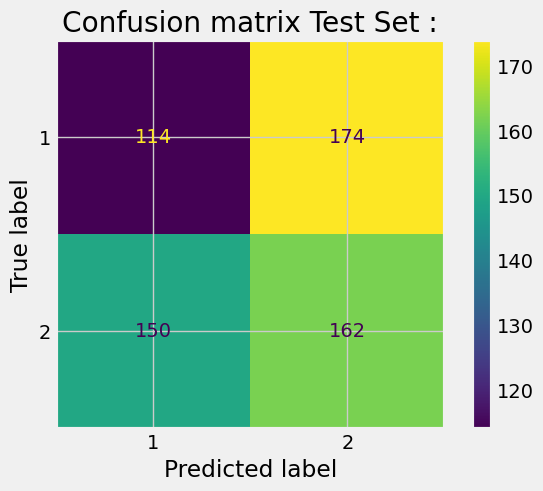

In [189]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set :')
plt.show()